# Import Libraries

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
import statsmodels.api as sm
#import mplcursors
from pylab import rcParams
from matplotlib.backends.backend_agg import FigureCanvasAgg
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
import sklearn
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor


plt.style.use('seaborn-darkgrid')

# Load the Dataset

In [3]:
df = pd.read_csv('COVIDdemographic.csv')

In [4]:
df.head(5)

,State,cases,deaths,Total Population,Total population_Male,Total population_Female,Under 5 years,5 to 9 years,10 to 14 years,15 to 19 years,...,65 to 74 years,75 to 84 years,85 years and over,RACE_Total population,White,Black or African American,American Indian and Alaska Native,Asian,Native Hawaiian and Other Pacific Islander,Total population_HISPANIC OR LATINO
0,Alabama,387786,14345,4887871,2369271,2518600,288589,290369,321430,332209,...,493396,251025,85242,4887871,3306838,1307040,22063,65095,1797,4887871
1,Alaska,18316,367,737438,382952,354486,52173,52544,49747,48514,...,59630,21000,7370,737438,474555,25197,111371,46381,7958,737438
2,Arizona,426614,18857,7171646,3565129,3606517,434032,441613,488738,477306,...,727956,398408,132739,7171646,5590505,336340,330599,237873,15661,7171646
3,Arkansas,161569,3301,3013825,1476680,1537145,188092,192523,203502,208021,...,296808,154699,56169,3013825,2306096,456714,20951,47548,9398,3013825
4,California,2664110,102387,39557045,19673553,19883492,2428493,2398894,2646096,2557470,...,3286461,1651296,729580,39557045,23535388,2283850,302792,5821585,155739,39557045


# Shape of a dataframe

In [5]:
df.shape

(51, 26)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 26 columns):
State                                         51 non-null object
cases                                         51 non-null int64
deaths                                        51 non-null int64
Total Population                              51 non-null int64
Total population_Male                         51 non-null int64
Total population_Female                       51 non-null int64
Under 5 years                                 51 non-null int64
5 to 9 years                                  51 non-null int64
10 to 14 years                                51 non-null int64
15 to 19 years                                51 non-null int64
20 to 24 years                                51 non-null int64
25 to 34 years                                51 non-null int64
35 to 44 years                                51 non-null int64
45 to 54 years                                51 non-null int64


In [7]:
df.isnull().sum()

State                                         0
cases                                         0
deaths                                        0
Total Population                              0
Total population_Male                         0
Total population_Female                       0
Under 5 years                                 0
5 to 9 years                                  0
10 to 14 years                                0
15 to 19 years                                0
20 to 24 years                                0
25 to 34 years                                0
35 to 44 years                                0
45 to 54 years                                0
55 to 59 years                                0
60 to 64 years                                0
65 to 74 years                                0
75 to 84 years                                0
85 years and over                             0
RACE_Total population                         0
White                                   

In [8]:
df.describe()

,cases,deaths,Total Population,Total population_Male,Total population_Female,Under 5 years,5 to 9 years,10 to 14 years,15 to 19 years,20 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 59 years,60 to 64 years,65 to 74 years,75 to 84 years,85 years and over,RACE_Total population,White,Black or African American,American Indian and Alaska Native,Asian,Native Hawaiian and Other Pacific Islander,Total population_HISPANIC OR LATINO
count,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,51.000000,5.100000e+01,5.100000e+01,5.100000e+01,51.000000,5.100000e+01,51.000000,5.100000e+01
mean,1.056306e+06,5.861198e+04,6.415048e+06,3.159179e+06,3.255868e+06,3.852219e+05,3.883510e+05,4.194691e+05,4.204999e+05,4.258424e+05,8.891113e+05,8.136952e+05,8.157891e+05,4.240106e+05,4.051534e+05,5.994375e+05,3.048618e+05,123604.862745,6.415048e+06,4.630844e+06,8.160346e+05,54933.078431,3.610823e+05,12275.568627,6.415048e+06
std,2.249183e+06,1.579360e+05,7.343308e+06,3.628720e+06,3.715146e+06,4.565007e+05,4.501072e+05,4.942501e+05,4.817187e+05,4.934780e+05,1.078738e+06,9.638990e+05,9.421501e+05,4.680109e+05,4.366872e+05,6.423737e+05,3.359567e+05,142146.703257,7.343308e+06,4.872214e+06,9.833194e+05,76477.000582,8.507498e+05,29651.663554,7.343308e+06
min,1.831600e+04,2.810000e+02,5.777370e+05,2.926190e+05,2.851180e+05,2.881000e+04,3.201900e+04,3.338600e+04,3.756800e+04,3.288000e+04,7.505800e+04,7.011300e+04,6.748700e+04,3.686900e+04,3.315300e+04,4.883300e+04,2.100000e+04,7370.000000,5.777370e+05,2.967470e+05,3.667000e+03,1743.000000,5.807000e+03,51.000000,5.777370e+05
25%,1.696980e+05,4.021000e+03,1.780020e+06,8.884075e+05,8.916125e+05,1.038075e+05,1.105810e+05,1.186685e+05,1.198940e+05,1.148050e+05,2.185410e+05,2.192580e+05,2.099755e+05,1.174285e+05,1.136820e+05,1.706250e+05,8.526700e+04,37668.000000,1.780020e+06,1.588392e+06,6.971400e+04,13736.500000,3.754350e+04,1211.000000,1.780020e+06
50%,3.877860e+05,1.425100e+04,4.468402e+06,2.199021e+06,2.269381e+06,2.734890e+05,2.799780e+05,2.858330e+05,2.889440e+05,3.007440e+05,5.926550e+05,5.568330e+05,5.673130e+05,3.035890e+05,2.953110e+05,4.354650e+05,2.118690e+05,81382.000000,4.468402e+06,3.305047e+06,3.547610e+05,25657.000000,1.190460e+05,3859.000000,4.468402e+06
75%,1.047118e+06,5.046050e+04,7.353618e+06,3.665994e+06,3.687624e+06,4.461130e+05,4.540500e+05,4.784465e+05,4.682640e+05,4.913170e+05,1.070712e+06,9.444730e+05,9.262360e+05,4.893070e+05,4.615040e+05,7.193685e+05,3.616560e+05,137769.500000,7.353618e+06,5.611884e+06,1.365175e+06,57508.000000,3.524065e+05,8678.000000,7.353618e+06
max,1.504181e+07,1.081194e+06,3.955704e+07,1.967355e+07,1.988349e+07,2.428493e+06,2.398894e+06,2.646096e+06,2.557470e+06,2.710448e+06,6.034398e+06,5.264457e+06,5.068026e+06,2.485050e+06,2.296376e+06,3.286461e+06,1.651296e+06,729580.000000,3.955704e+07,2.353539e+07,3.527027e+06,330599.000000,5.821585e+06,155739.000000,3.955704e+07


In [9]:
corr = df.corr()

In [10]:
corr

,cases,deaths,Total Population,Total population_Male,Total population_Female,Under 5 years,5 to 9 years,10 to 14 years,15 to 19 years,20 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 59 years,60 to 64 years,65 to 74 years,75 to 84 years,85 years and over,RACE_Total population,White,Black or African American,American Indian and Alaska Native,Asian,Native Hawaiian and Other Pacific Islander,Total population_HISPANIC OR LATINO
cases,1.000000,0.990033,0.474197,0.467591,0.480579,0.445039,0.432210,0.427069,0.449039,0.466246,0.471632,0.456208,0.489046,0.504028,0.508914,0.490507,0.500801,0.536630,0.474197,0.449186,0.512076,0.072430,0.399092,0.045184,0.474197
deaths,0.990033,1.000000,0.381703,0.374954,0.388237,0.352253,0.338495,0.332640,0.355787,0.374678,0.380169,0.362104,0.396419,0.412764,0.419185,0.401017,0.412830,0.449968,0.381703,0.357395,0.437061,0.044793,0.321336,0.002666,0.381703
Total Population,0.474197,0.381703,1.000000,0.999922,0.999926,0.994301,0.994205,0.994159,0.996431,0.997935,0.997147,0.998273,0.999294,0.996956,0.994484,0.987113,0.972106,0.964929,1.000000,0.987836,0.790134,0.446071,0.846644,0.469451,1.000000
Total population_Male,0.467591,0.374954,0.999922,1.000000,0.999696,0.994986,0.994910,0.994888,0.996746,0.998295,0.997662,0.998700,0.998933,0.996223,0.993517,0.985777,0.970211,0.963131,0.999922,0.987550,0.784252,0.450225,0.849893,0.474392,0.999922
Total population_Female,0.480579,0.388237,0.999926,0.999696,1.000000,0.993483,0.993368,0.993297,0.995975,0.997434,0.996495,0.997706,0.999498,0.997522,0.995280,0.988270,0.973811,0.966540,0.999926,0.987967,0.795760,0.441946,0.843344,0.464553,0.999926
Under 5 years,0.445039,0.352253,0.994301,0.994986,0.993483,1.000000,0.999627,0.999392,0.998417,0.996974,0.995016,0.997464,0.990949,0.984225,0.979059,0.966701,0.945656,0.934517,0.994301,0.982582,0.776991,0.459525,0.843027,0.473724,0.994301
5 to 9 years,0.432210,0.338495,0.994205,0.994910,0.993368,0.999627,1.000000,0.999727,0.998928,0.996929,0.994203,0.997355,0.990943,0.984184,0.979074,0.967036,0.945379,0.932996,0.994205,0.983305,0.780179,0.459685,0.839254,0.471881,0.994205
10 to 14 years,0.427069,0.332640,0.994159,0.994888,0.993297,0.999392,0.999727,1.000000,0.998906,0.996780,0.994059,0.997334,0.990913,0.983932,0.978796,0.967042,0.945864,0.933797,0.994159,0.982653,0.778248,0.462720,0.841328,0.472402,0.994159
15 to 19 years,0.449039,0.355787,0.996431,0.996746,0.995975,0.998417,0.998928,0.998906,1.000000,0.998400,0.994885,0.997664,0.994234,0.988875,0.984602,0.973195,0.953029,0.941984,0.996431,0.985960,0.790820,0.450504,0.836441,0.459347,0.996431
20 to 24 years,0.466246,0.374678,0.997935,0.998295,0.997434,0.996974,0.996929,0.996780,0.998400,1.000000,0.998198,0.998600,0.996324,0.991692,0.987779,0.976225,0.957059,0.950304,0.997935,0.982956,0.775786,0.457376,0.858616,0.480216,0.997935


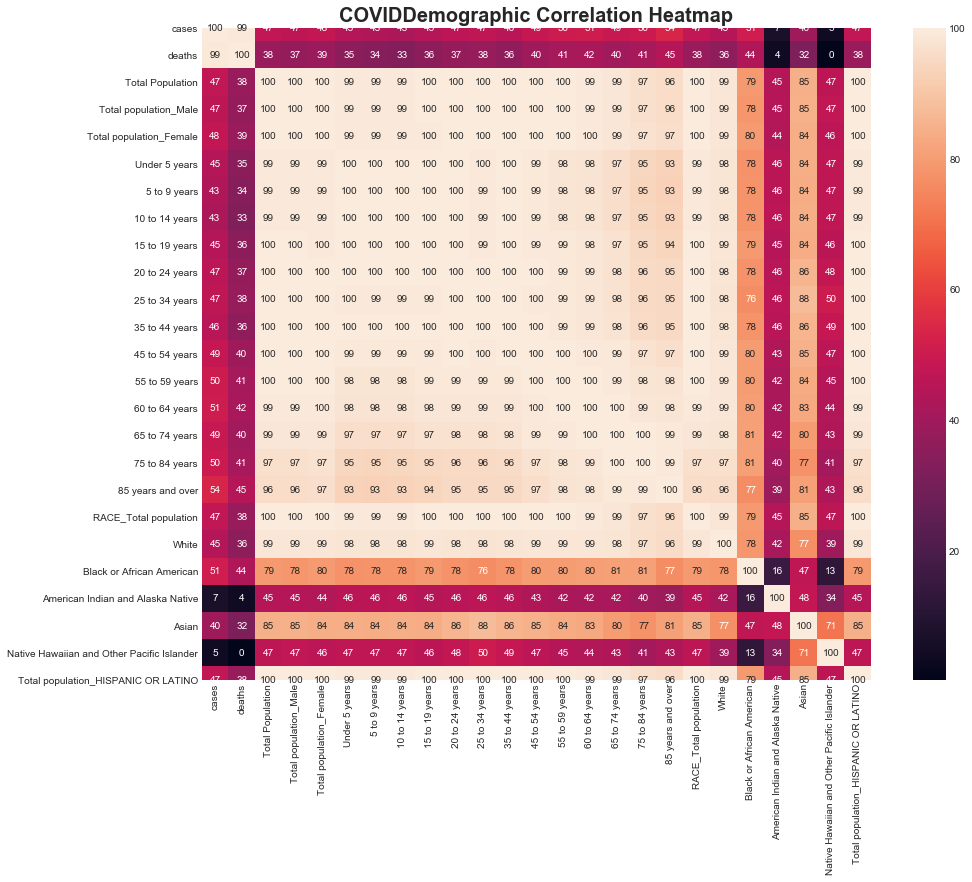

In [11]:
# Make the figsize 15 x 12
plt.figure(figsize=(15,12))

# Plot heatmap of annotated correlations
sns.heatmap(corr *100, annot=True, fmt = '.0f')

#Title
plt.title('COVIDDemographic Correlation Heatmap', fontweight = 'bold', fontsize = 20);


# Histogram

# Race

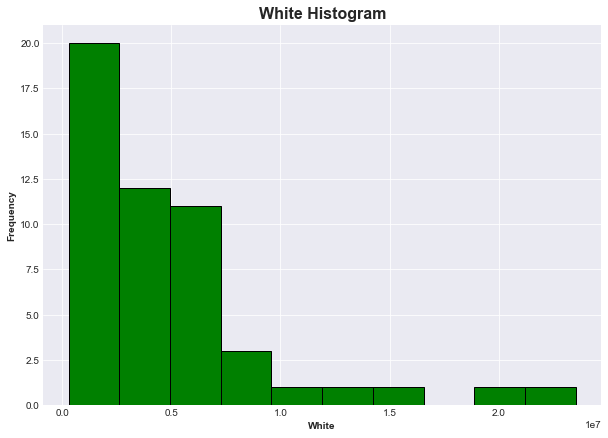

In [12]:
plt.style.use('seaborn-darkgrid')

df['White'].plot(kind = 'hist', color = 'green', edgecolor = 'black', figsize = (10,7))
plt.title('White Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('White', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

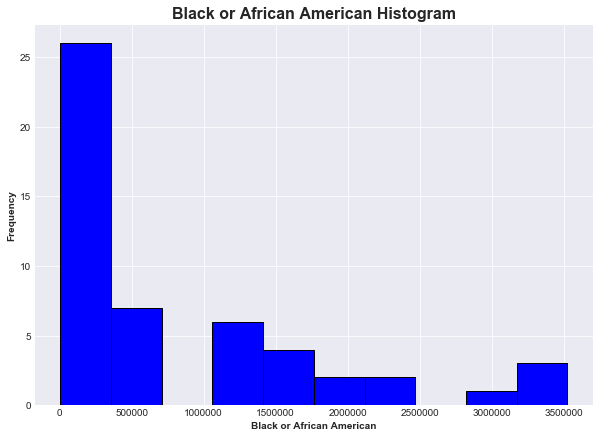

In [13]:
plt.style.use('seaborn-darkgrid')

df['Black or African American'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('Black or African American Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Black or African American', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

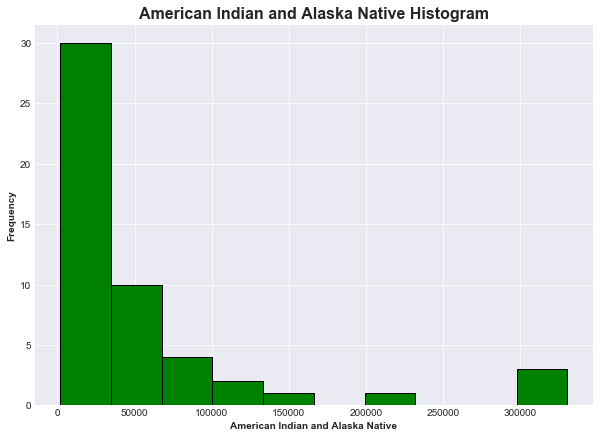

In [14]:
plt.style.use('seaborn-darkgrid')

df['American Indian and Alaska Native'].plot(kind = 'hist', color = 'green', edgecolor = 'black', figsize = (10,7))
plt.title('American Indian and Alaska Native Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('American Indian and Alaska Native', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

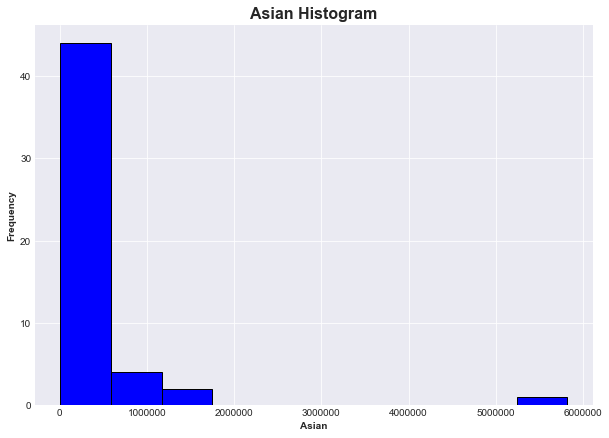

In [15]:
plt.style.use('seaborn-darkgrid')

df['Asian'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('Asian Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Asian', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

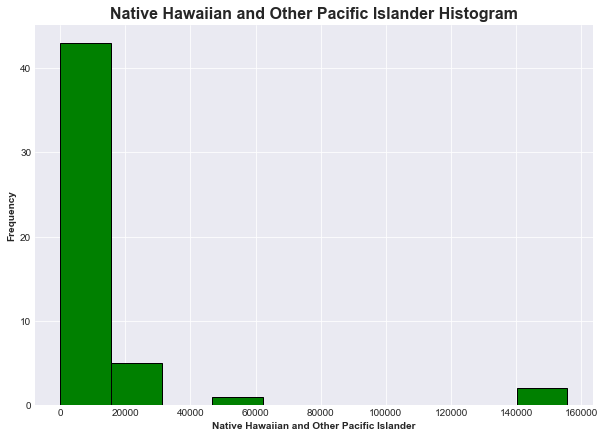

In [16]:
plt.style.use('seaborn-darkgrid')

df['Native Hawaiian and Other Pacific Islander'].plot(kind = 'hist', color = 'green', edgecolor = 'black', figsize = (10,7))
plt.title('Native Hawaiian and Other Pacific Islander Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Native Hawaiian and Other Pacific Islander', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

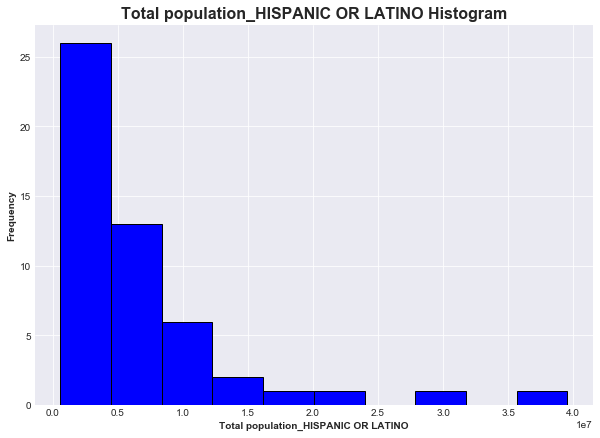

In [17]:
plt.style.use('seaborn-darkgrid')

df['Total population_HISPANIC OR LATINO'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('Total population_HISPANIC OR LATINO Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Total population_HISPANIC OR LATINO', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

# Violin Plot

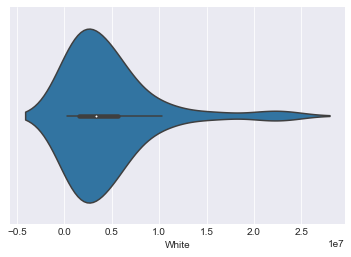

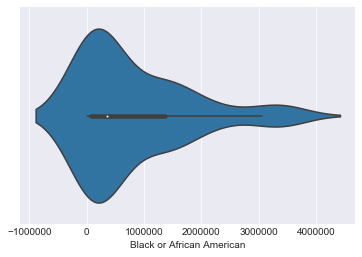

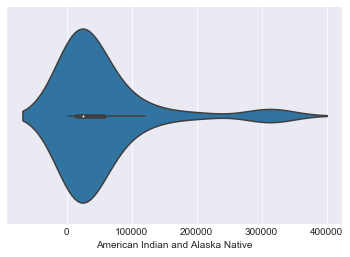

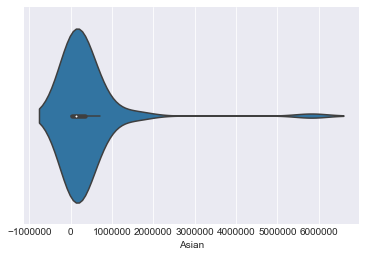

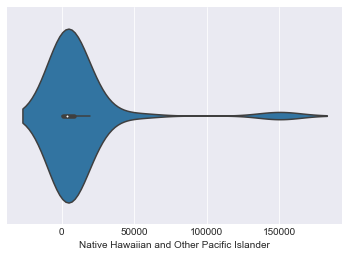

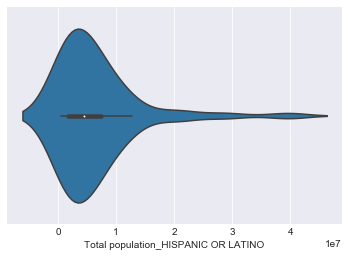

In [18]:
# Violin plot of White
sns.violinplot(x='White', data=df)
plt.show()

# Violin plot of Black or African American
sns.violinplot(x='Black or African American', data=df)
plt.show()

# Violin plot of American Indian and Alaska Native
sns.violinplot(x='American Indian and Alaska Native', data=df)
plt.show()

# Violin plot of Asian
sns.violinplot(x='Asian', data=df)
plt.show()

# Violin plot of Native Hawaiian and Other Pacific Islander
sns.violinplot(x='Native Hawaiian and Other Pacific Islander', data=df)
plt.show()

# Violin plot of Hispanic or Latino
sns.violinplot(x='Total population_HISPANIC OR LATINO', data=df)
plt.show()

# RACE VS COVID-19 Case Count

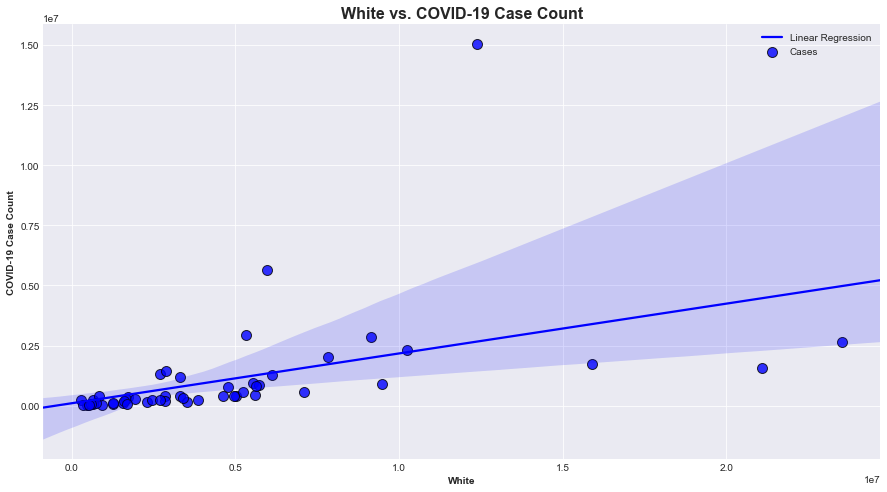

In [19]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'White', y = 'cases', data = df, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('White vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('White', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

# RACE - Ordinary Least Square Regression(OLS)

In [20]:
model1 = sm.OLS(df['cases'], df['White']).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.348
Model:                            OLS   Adj. R-squared (uncentered):              0.335
Method:                 Least Squares   F-statistic:                              26.64
Date:                Mon, 08 Jun 2020   Prob (F-statistic):                    4.25e-06
Time:                        22:56:06   Log-Likelihood:                         -812.08
No. Observations:                  51   AIC:                                      1626.
Df Residuals:                      50   BIC:                                      1628.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
White          0.2173      0.042      5.161      0.000       0.133       0.302
==============================================================================
Omnibus:                       87.470   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1651.819
Skew:                           4.704   Prob(JB):                         0.00
Kurtosis:                      29.245   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

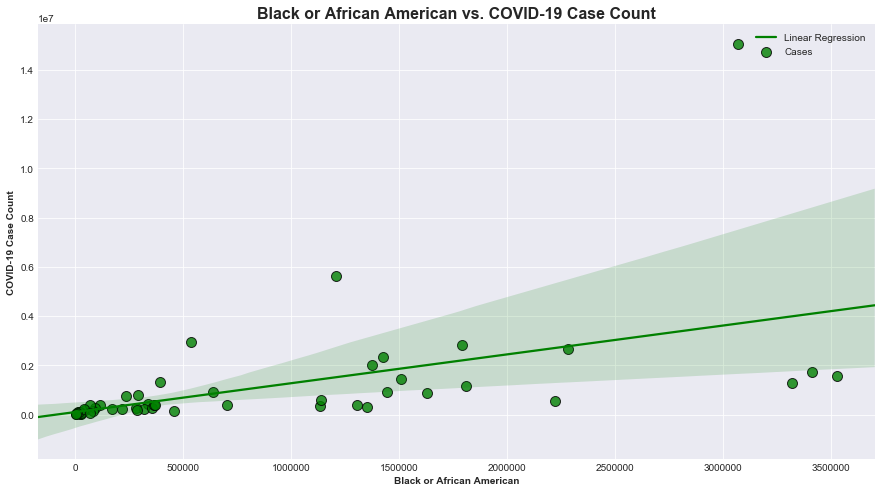

In [21]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Black or African American', y = 'cases', data = df, color = 'g', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Black or African American vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Black or African American', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [22]:
model2 = sm.OLS(df['cases'], df['Black or African American']).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.397
Model:                            OLS   Adj. R-squared (uncentered):              0.385
Method:                 Least Squares   F-statistic:                              32.88
Date:                Mon, 08 Jun 2020   Prob (F-statistic):                    5.65e-07
Time:                        22:56:06   Log-Likelihood:                         -810.08
No. Observations:                  51   AIC:                                      1622.
Df Residuals:                      50   BIC:                                      1624.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Black or African American     1.2221      0.213      5.734      0.000       0.794       1.650
==============================================================================
Omnibus:                       76.927   Durbin-Watson:                   2.148
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1072.881
Skew:                           3.962   Prob(JB):                    1.06e-233
Kurtosis:                      24.026   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

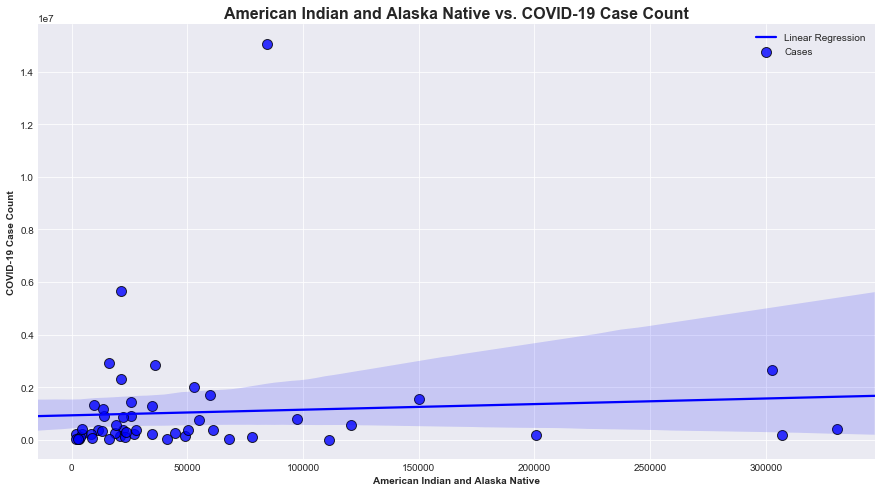

In [23]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'American Indian and Alaska Native', y = 'cases', data = df, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('American Indian and Alaska Native vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('American Indian and Alaska Native', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [24]:
model3 = sm.OLS(df['cases'], df['American Indian and Alaska Native']).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.093
Model:                            OLS   Adj. R-squared (uncentered):              0.075
Method:                 Least Squares   F-statistic:                              5.114
Date:                Mon, 08 Jun 2020   Prob (F-statistic):                      0.0281
Time:                        22:56:07   Log-Likelihood:                         -820.48
No. Observations:                  51   AIC:                                      1643.
Df Residuals:                      50   BIC:                                      1645.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
American Indian and Alaska Native     8.0259      3.549      2.261      0.028       0.897      15.154
==============================================================================
Omnibus:                       84.345   Durbin-Watson:                   2.150
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1413.603
Skew:                           4.500   Prob(JB):                    1.10e-307
Kurtosis:                      27.171   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

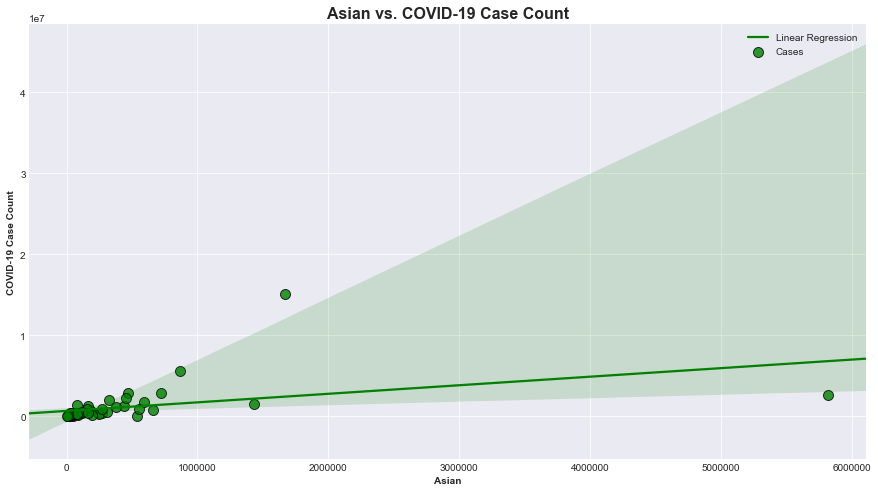

In [25]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Asian', y = 'cases', data = df, color = 'g', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Asian vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Asian', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [26]:
model4 = sm.OLS(df['cases'], df['Asian']).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.250
Model:                            OLS   Adj. R-squared (uncentered):              0.235
Method:                 Least Squares   F-statistic:                              16.69
Date:                Mon, 08 Jun 2020   Prob (F-statistic):                    0.000159
Time:                        22:56:07   Log-Likelihood:                         -815.62
No. Observations:                  51   AIC:                                      1633.
Df Residuals:                      50   BIC:                                      1635.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Asian          1.3454      0.329      4.085      0.000       0.684       2.007
==============================================================================
Omnibus:                       76.825   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1248.141
Skew:                           3.840   Prob(JB):                    9.32e-272
Kurtosis:                      25.986   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

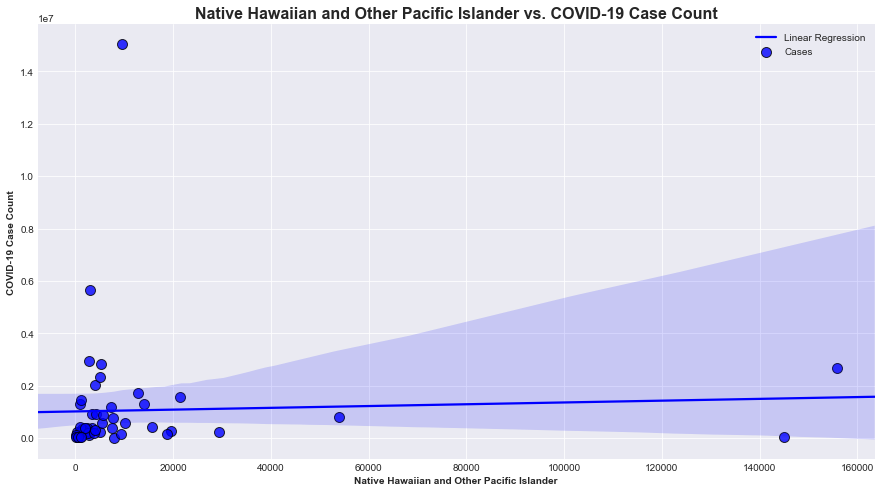

In [27]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Native Hawaiian and Other Pacific Islander', y = 'cases', data = df, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Native Hawaiian and Other Pacific Islander vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Native Hawaiian and Other Pacific Islander', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [28]:
model5 = sm.OLS(df['cases'], df['Native Hawaiian and Other Pacific Islander']).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.041
Model:                            OLS   Adj. R-squared (uncentered):              0.022
Method:                 Least Squares   F-statistic:                              2.149
Date:                Mon, 08 Jun 2020   Prob (F-statistic):                       0.149
Time:                        22:56:07   Log-Likelihood:                         -821.89
No. Observations:                  51   AIC:                                      1646.
Df Residuals:                      50   BIC:                                      1648.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Native Hawaiian and Other Pacific Islander    15.7219     10.726      1.466      0.149      -5.822      37.265
==============================================================================
Omnibus:                       89.421   Durbin-Watson:                   1.836
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1743.121
Skew:                           4.870   Prob(JB):                         0.00
Kurtosis:                      29.934   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

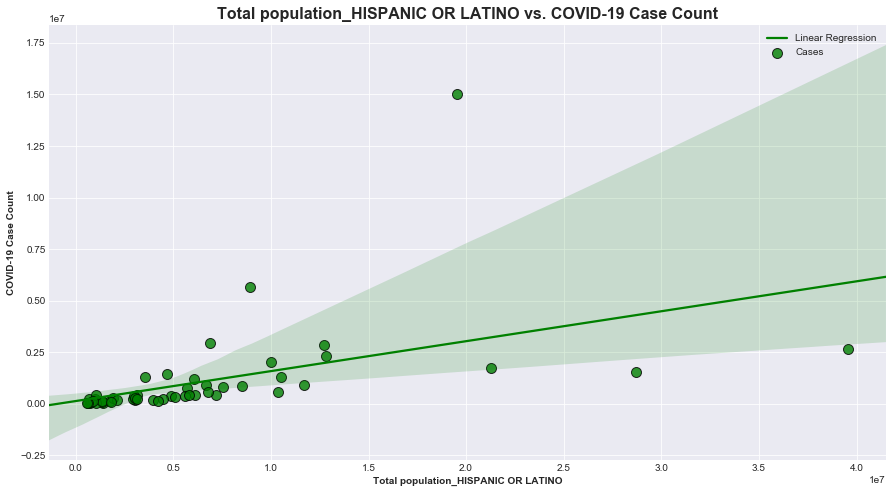

In [29]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Total population_HISPANIC OR LATINO', y = 'cases', data = df, color = 'g', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Total population_HISPANIC OR LATINO vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Total population_HISPANIC OR LATINO', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [30]:
model6 = sm.OLS(df['cases'], df['Total population_HISPANIC OR LATINO']).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.366
Model:                            OLS   Adj. R-squared (uncentered):              0.353
Method:                 Least Squares   F-statistic:                              28.84
Date:                Mon, 08 Jun 2020   Prob (F-statistic):                    2.05e-06
Time:                        22:56:07   Log-Likelihood:                         -811.35
No. Observations:                  51   AIC:                                      1625.
Df Residuals:                      50   BIC:                                      1627.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Total population_HISPANIC OR LATINO     0.1537      0.029      5.370      0.000       0.096       0.211
==============================================================================
Omnibus:                       84.397   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1486.407
Skew:                           4.465   Prob(JB):                         0.00
Kurtosis:                      27.895   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# ALL RACES - Ordinary Least Square Regression(OLS)

In [31]:
model7 = sm.OLS(df['cases'], df[['White', 'Black or African American', 'American Indian and Alaska Native',
                                       'Asian', 'Native Hawaiian and Other Pacific Islander',
                                       'Total population_HISPANIC OR LATINO']]).fit()
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.490
Model:                            OLS   Adj. R-squared (uncentered):              0.421
Method:                 Least Squares   F-statistic:                              7.192
Date:                Mon, 08 Jun 2020   Prob (F-statistic):                    2.03e-05
Time:                        22:56:07   Log-Likelihood:                         -805.82
No. Observations:                  51   AIC:                                      1624.
Df Residuals:                      45   BIC:                                      1635.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
White                                          4.1227      2.735      1.507      0.139      -1.387       9.632
Black or African American                      5.1157      2.709      1.888      0.065      -0.341      10.573
American Indian and Alaska Native              6.1073      6.192      0.986      0.329      -6.365      18.579
Asian                                         10.1958      5.828      1.750      0.087      -1.542      21.933
Native Hawaiian and Other Pacific Islander   -23.9235     12.942     -1.848      0.071     -49.990       2.143
Total population_HISPANIC OR LATINO           -4.0643      2.669     -1.523      0.135      -9.440       1.312
==============================================================================
Omnibus:                       75.243   Durbin-Watson:                   2.241
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1056.345
Skew:                           3.810   Prob(JB):                    4.15e-230
Kurtosis:                      23.953   Cond. No.                         588.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# RACE VS COVID-19 Case Per State

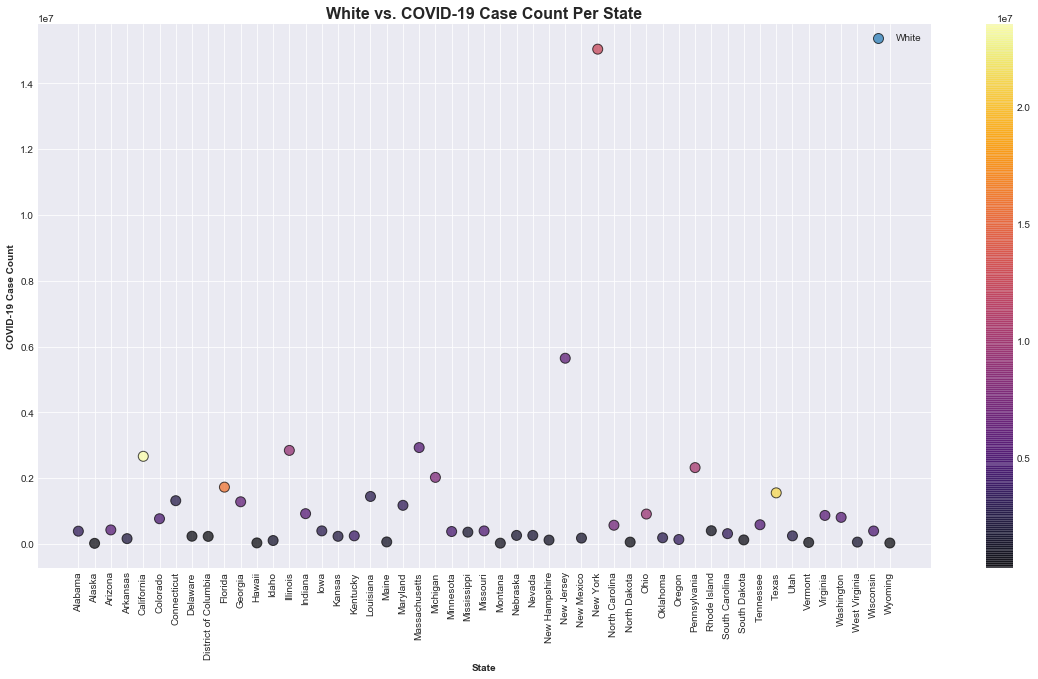

In [32]:
fig = plt.figure(figsize = (20,10))

x = df['State'] 
y = df['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = df['White'], cmap = 'inferno')
plt.title('White vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['White'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

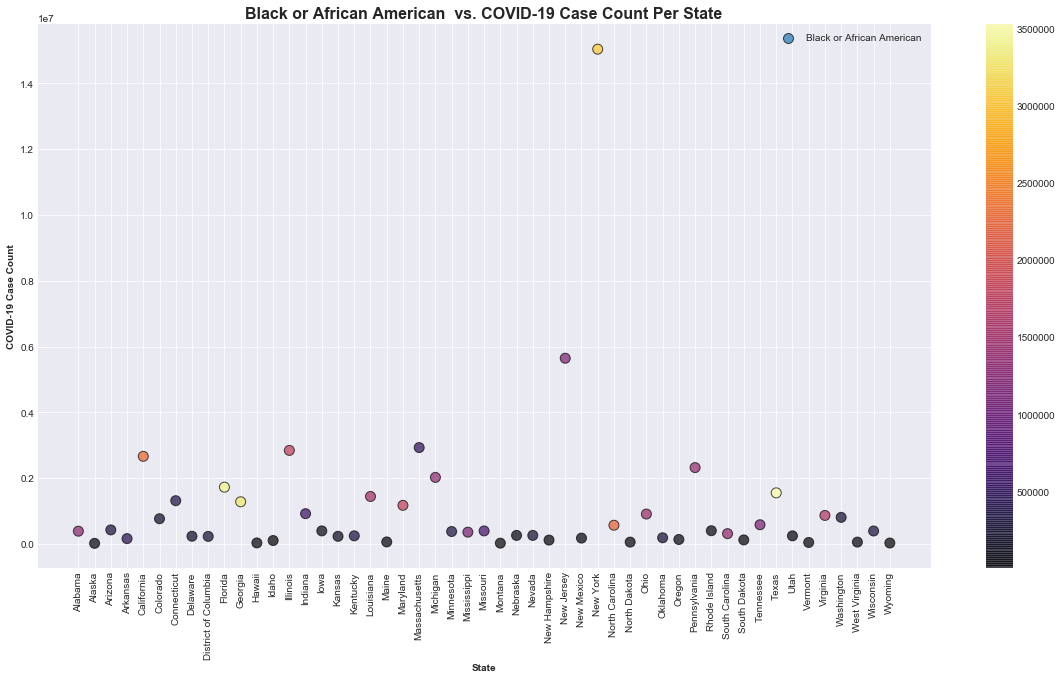

In [33]:
fig = plt.figure(figsize = (20,10))

x = df['State'] 
y = df['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = df['Black or African American'], cmap = 'inferno')
plt.title('Black or African American  vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Black or African American'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

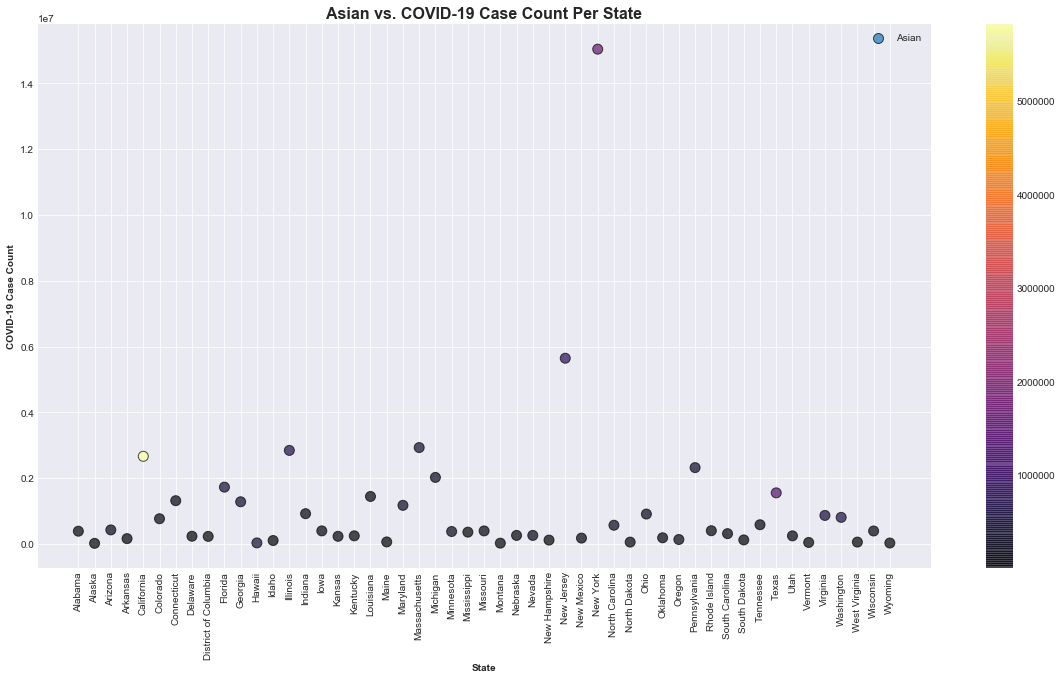

In [34]:
fig = plt.figure(figsize = (20,10))

x = df['State'] 
y = df['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = df['Asian'], cmap = 'inferno')
plt.title('Asian vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Asian'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

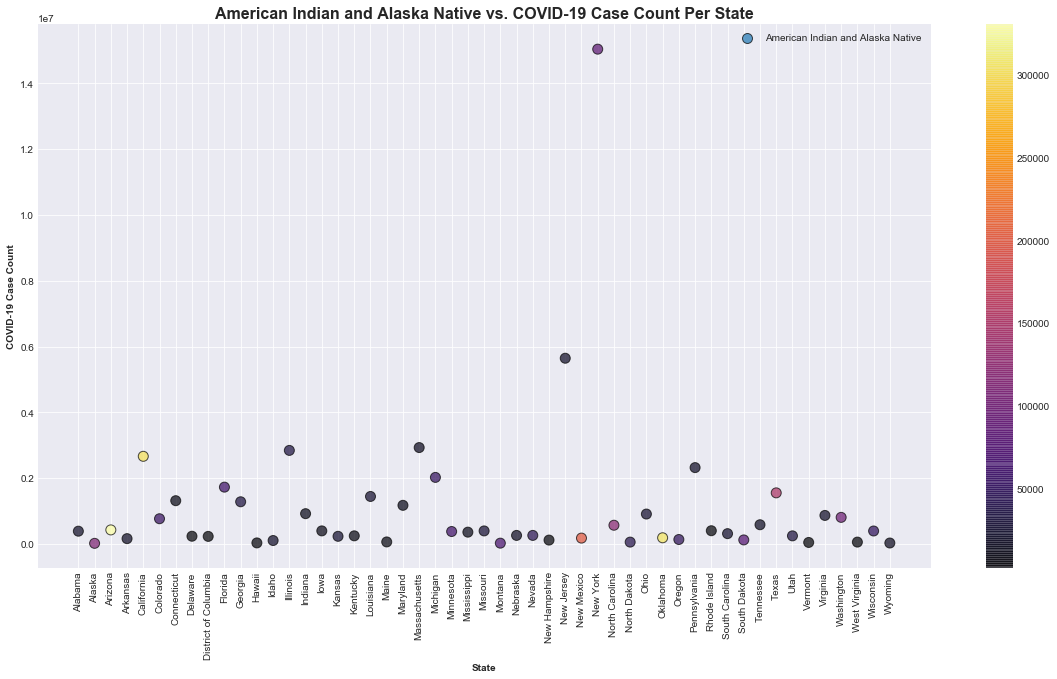

In [35]:
fig = plt.figure(figsize = (20,10))

x = df['State'] 
y = df['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = df['American Indian and Alaska Native'], cmap = 'inferno')
plt.title('American Indian and Alaska Native vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['American Indian and Alaska Native'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

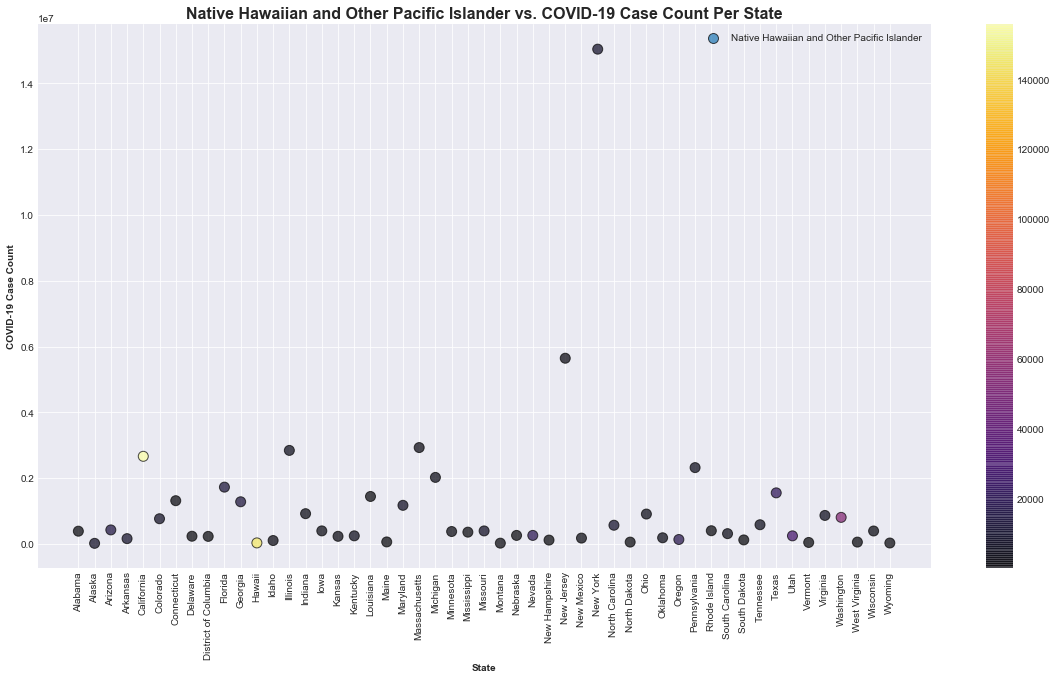

In [36]:
fig = plt.figure(figsize = (20,10))

x = df['State'] 
y = df['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = df['Native Hawaiian and Other Pacific Islander'], cmap = 'inferno')
plt.title('Native Hawaiian and Other Pacific Islander vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Native Hawaiian and Other Pacific Islander'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

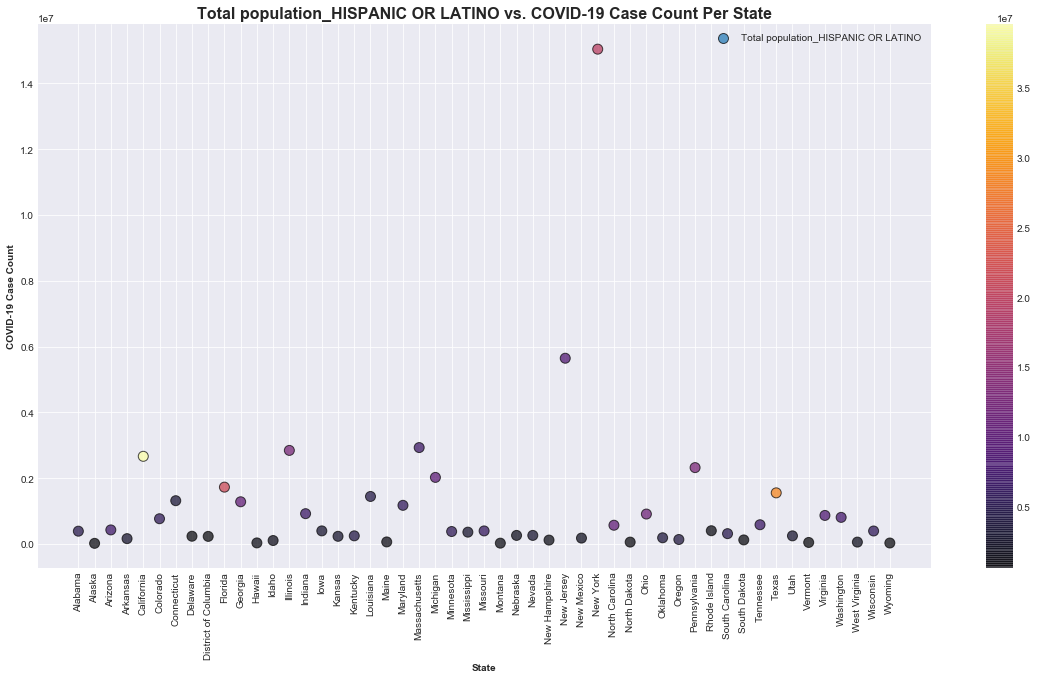

In [37]:
fig = plt.figure(figsize = (20,10))

x = df['State'] 
y = df['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = df['Total population_HISPANIC OR LATINO'], cmap = 'inferno')
plt.title('Total population_HISPANIC OR LATINO vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Total population_HISPANIC OR LATINO'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

# RACE - XGBoost

In [6]:
test_len = int(0.25 * len(df))
train_len = len(df) - test_len
print('Train Set Len: ' + str(train_len))
print('Test Set Len: ' + str(test_len))

train = df[:train_len]
test = df[train_len:]
print('Train Set Shape: ' + str(train.shape))
print('Test Set Shape: ' + str(test.shape))

Train Set Len: 39
Test Set Len: 12
Train Set Shape: (39, 26)
Test Set Shape: (12, 26)


In [23]:
features_list = ['White']

target = 'cases'
    
X_train = train[features_list]
y_train = train[target]
X_test = test[features_list]
y_test = test[target]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(np.array(X_train).reshape(-1, 1))
X_test_scaled = scaler.transform(np.array(X_test).reshape(-1, 1))

XGBmodel = XGBRegressor()
XGBmodel.fit(X_train_scaled, y_train)

train_predictions_scaled = XGBmodel.predict(X_train_scaled)
train_predictions = scaler.inverse_transform(train_predictions_scaled)
test_predictions_scaled = XGBmodel.predict(X_test_scaled)
test_predictions = scaler.inverse_transform(test_predictions_scaled)



MAE = mean_absolute_error(y_test, test_predictions)
MSE = mean_squared_error(y_test, test_predictions)
RMS = sqrt(mean_squared_error(y_test, test_predictions))
R2Score = r2_score(y_test, test_predictions)

print('MAE Value:', MAE)
print('MSE Value:', MSE)
print('RMS Value:', RMS)
print('R2 Score:', R2Score)

MAE Value: 3526580214152.4165
MSE Value: 3.2538584769002745e+25
RMS Value: 5704260229775.877
R2 Score: -176970381936522.12


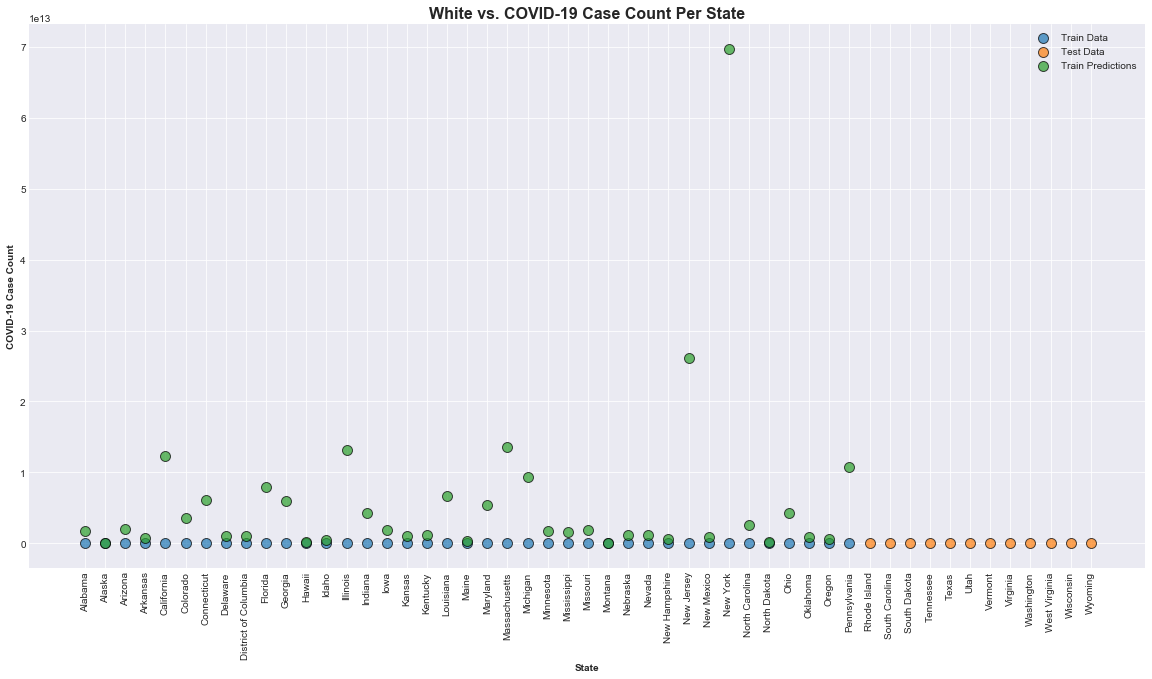

In [24]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = train['State'], y = train_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('White vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Train Predictions'])

plt.xticks(rotation = 90)
plt.show();

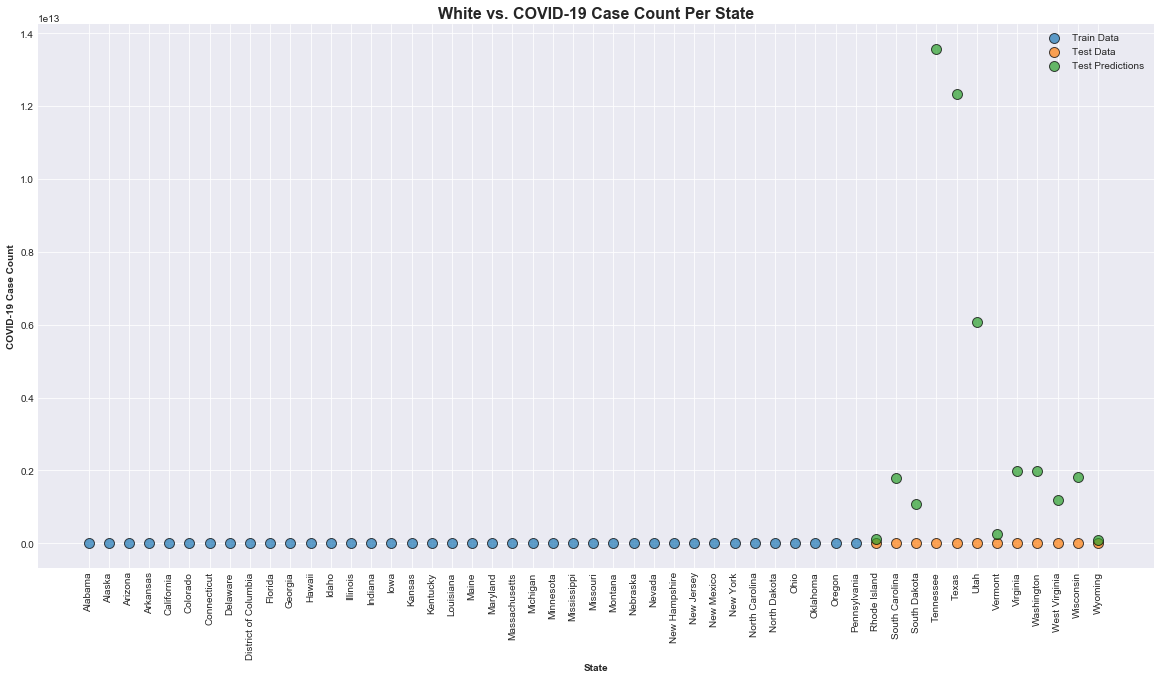

In [25]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('White vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Test Predictions'])

plt.xticks(rotation = 90)
plt.show();

In [7]:
features_list = ['Black or African American']

target = 'cases'
    
X_train = train[features_list]
y_train = train[target]
X_test = test[features_list]
y_test = test[target]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(np.array(X_train).reshape(-1, 1))
y_train_scaled = scaler.fit_transform(np.array(y_train).reshape(-1, 1))
X_test_scaled = scaler.transform(np.array(X_test).reshape(-1, 1))

XGBmodel = XGBRegressor()
XGBmodel.fit(X_train_scaled, y_train_scaled)


train_predictions_scaled = XGBmodel.predict(X_train_scaled)
train_predictions = scaler.inverse_transform(train_predictions_scaled)
test_predictions_scaled = XGBmodel.predict(X_test_scaled)
test_predictions = scaler.inverse_transform(test_predictions_scaled)

MAE = mean_absolute_error(y_test, test_predictions)
MSE = mean_squared_error(y_test, test_predictions)
RMS = sqrt(mean_squared_error(y_test, test_predictions))
R2Score = r2_score(y_test, test_predictions)

print('MAE Value:', MAE)
print('MSE Value:', MSE)
print('RMS Value:', RMS)
print('R2 Score:', R2Score)

MAE Value: 859641.2721354166
MSE Value: 1159180196671.966
RMS Value: 1076652.310020262
R2 Score: -5.304532406514343


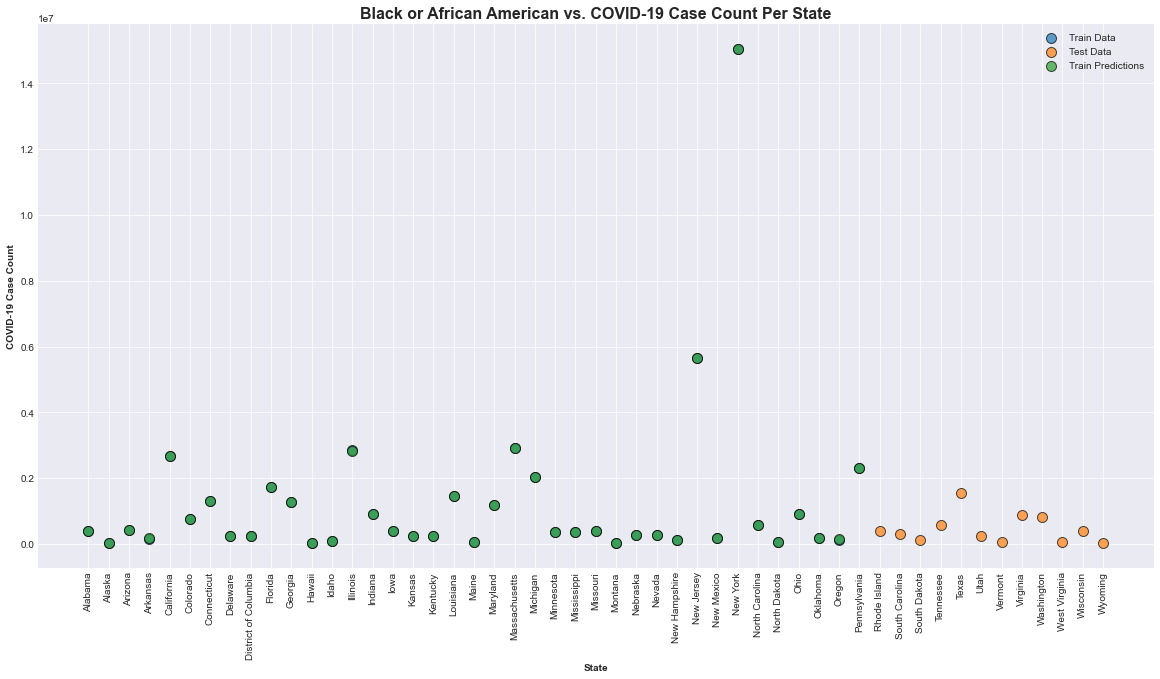

In [8]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = train['State'], y = train_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Black or African American vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Train Predictions'])

plt.xticks(rotation = 90)
plt.show();

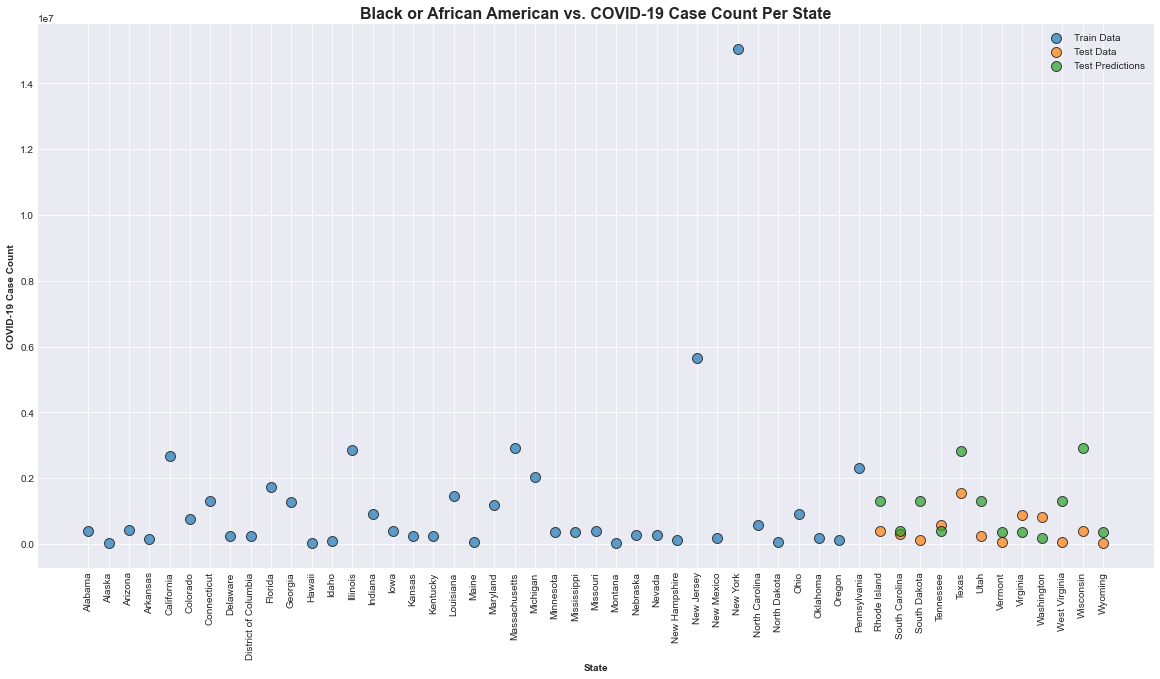

In [9]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Black or African American vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Test Predictions'])

plt.xticks(rotation = 90)
plt.show();

In [10]:
features_list = ['Asian']

target = 'cases'
    
X_train = train[features_list]
y_train = train[target]
X_test = test[features_list]
y_test = test[target]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(np.array(X_train).reshape(-1, 1))
X_test_scaled = scaler.transform(np.array(X_test).reshape(-1, 1))

XGBmodel = XGBRegressor()
XGBmodel.fit(X_train_scaled, y_train)

train_predictions_scaled = XGBmodel.predict(X_train_scaled)
train_predictions = scaler.inverse_transform(train_predictions_scaled)
test_predictions_scaled = XGBmodel.predict(X_test_scaled)
test_predictions = scaler.inverse_transform(test_predictions_scaled)



MAE = mean_absolute_error(y_test, test_predictions)
MSE = mean_squared_error(y_test, test_predictions)
RMS = sqrt(mean_squared_error(y_test, test_predictions))
R2Score = r2_score(y_test, test_predictions)

print('MAE Value:', MAE)
print('MSE Value:', MSE)
print('RMS Value:', RMS)
print('R2 Score:', R2Score)

MAE Value: 1695533100424.4167
MSE Value: 1.7340845646185267e+25
RMS Value: 4164234100790.3564
R2 Score: -94313139274302.94


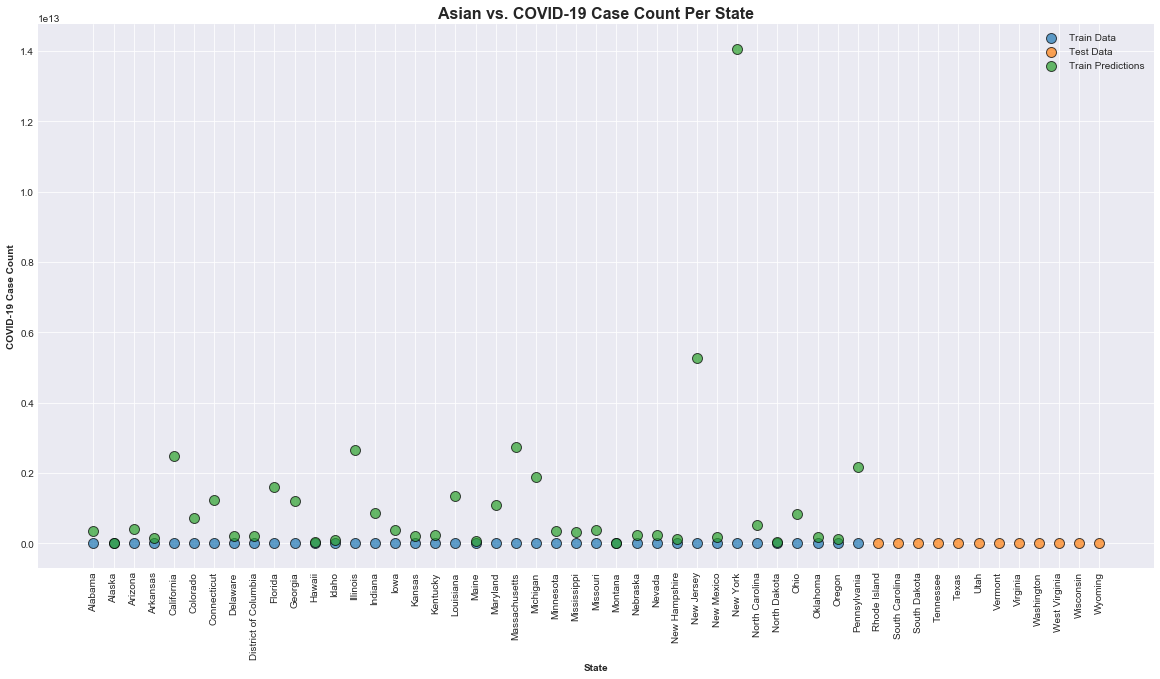

In [11]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = train['State'], y = train_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Asian vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Train Predictions'])

plt.xticks(rotation = 90)
plt.show();

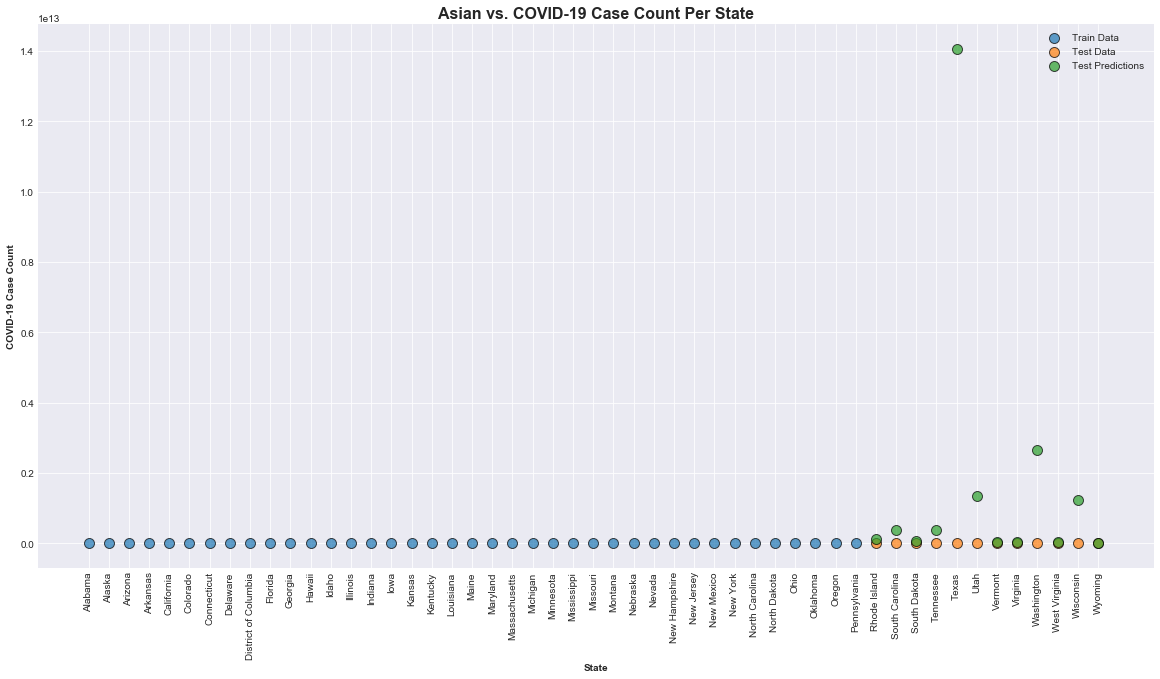

In [12]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Asian vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Test Predictions'])

plt.xticks(rotation = 90)
plt.show();

In [13]:
features_list = ['American Indian and Alaska Native']

target = 'cases'
    
X_train = train[features_list]
y_train = train[target]
X_test = test[features_list]
y_test = test[target]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(np.array(X_train).reshape(-1, 1))
X_test_scaled = scaler.transform(np.array(X_test).reshape(-1, 1))

XGBmodel = XGBRegressor()
XGBmodel.fit(X_train_scaled, y_train)

train_predictions_scaled = XGBmodel.predict(X_train_scaled)
train_predictions = scaler.inverse_transform(train_predictions_scaled)
test_predictions_scaled = XGBmodel.predict(X_test_scaled)
test_predictions = scaler.inverse_transform(test_predictions_scaled)



MAE = mean_absolute_error(y_test, test_predictions)
MSE = mean_squared_error(y_test, test_predictions)
RMS = sqrt(mean_squared_error(y_test, test_predictions))
R2Score = r2_score(y_test, test_predictions)

print('MAE Value:', MAE)
print('MSE Value:', MSE)
print('RMS Value:', RMS)
print('R2 Score:', R2Score)

MAE Value: 249934055475.08334
MSE Value: 2.6440828749405413e+23
RMS Value: 514206463878.1334
R2 Score: -1438059951198.2507


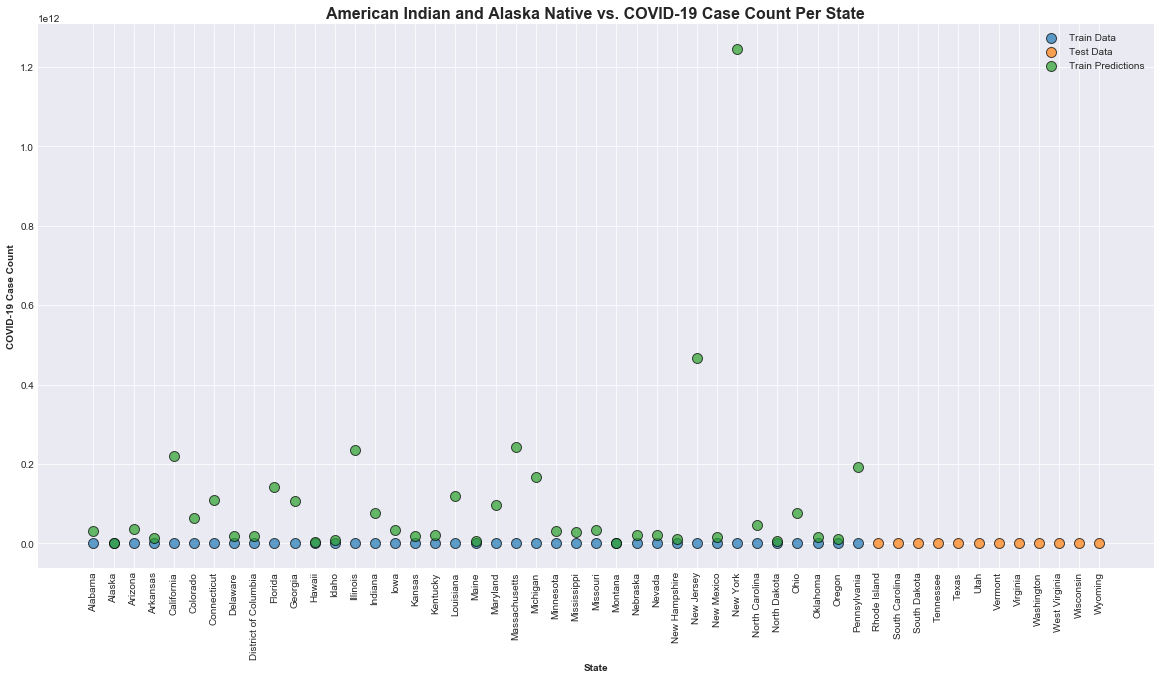

In [14]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = train['State'], y = train_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('American Indian and Alaska Native vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Train Predictions'])

plt.xticks(rotation = 90)
plt.show();

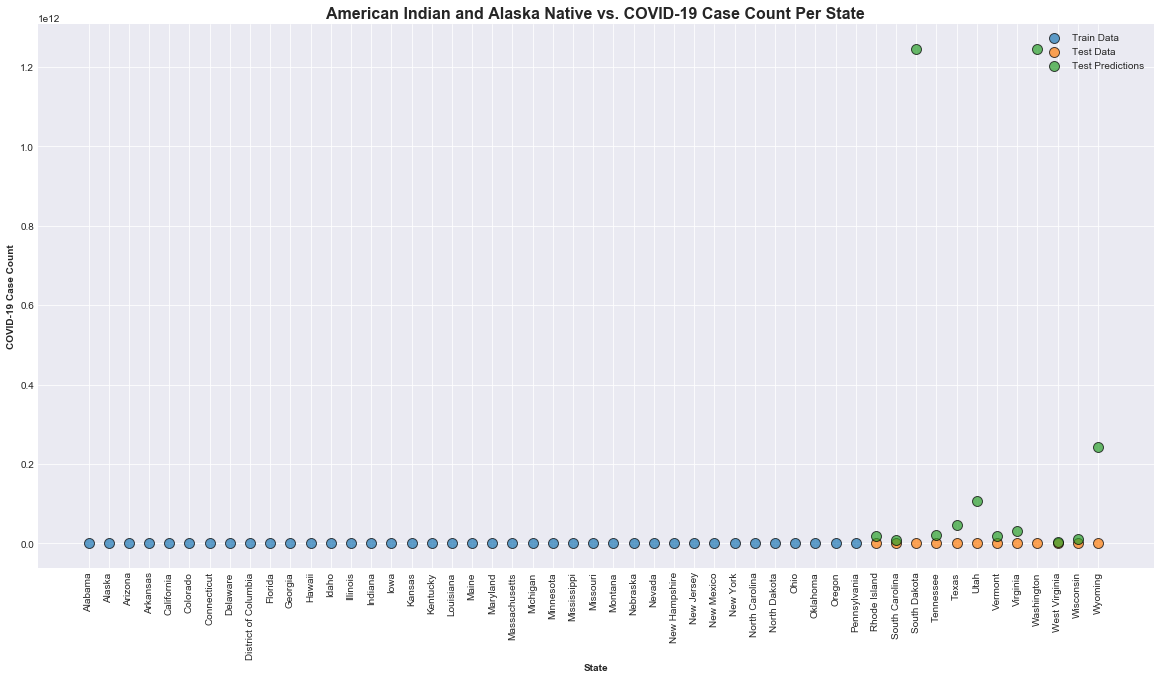

In [15]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('American Indian and Alaska Native vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Test Predictions'])

plt.xticks(rotation = 90)
plt.show();

In [16]:
features_list = ['Native Hawaiian and Other Pacific Islander']

target = 'cases'
    
X_train = train[features_list]
y_train = train[target]
X_test = test[features_list]
y_test = test[target]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(np.array(X_train).reshape(-1, 1))
X_test_scaled = scaler.transform(np.array(X_test).reshape(-1, 1))

XGBmodel = XGBRegressor()
XGBmodel.fit(X_train_scaled, y_train)

train_predictions_scaled = XGBmodel.predict(X_train_scaled)
train_predictions = scaler.inverse_transform(train_predictions_scaled)
test_predictions_scaled = XGBmodel.predict(X_test_scaled)
test_predictions = scaler.inverse_transform(test_predictions_scaled)



MAE = mean_absolute_error(y_test, test_predictions)
MSE = mean_squared_error(y_test, test_predictions)
RMS = sqrt(mean_squared_error(y_test, test_predictions))
R2Score = r2_score(y_test, test_predictions)

print('MAE Value:', MAE)
print('MSE Value:', MSE)
print('RMS Value:', RMS)
print('R2 Score:', R2Score)

MAE Value: 28943767688.416668
MSE Value: 1.9884421372834336e+21
RMS Value: 44591951485.480354
R2 Score: -10814710195.890675


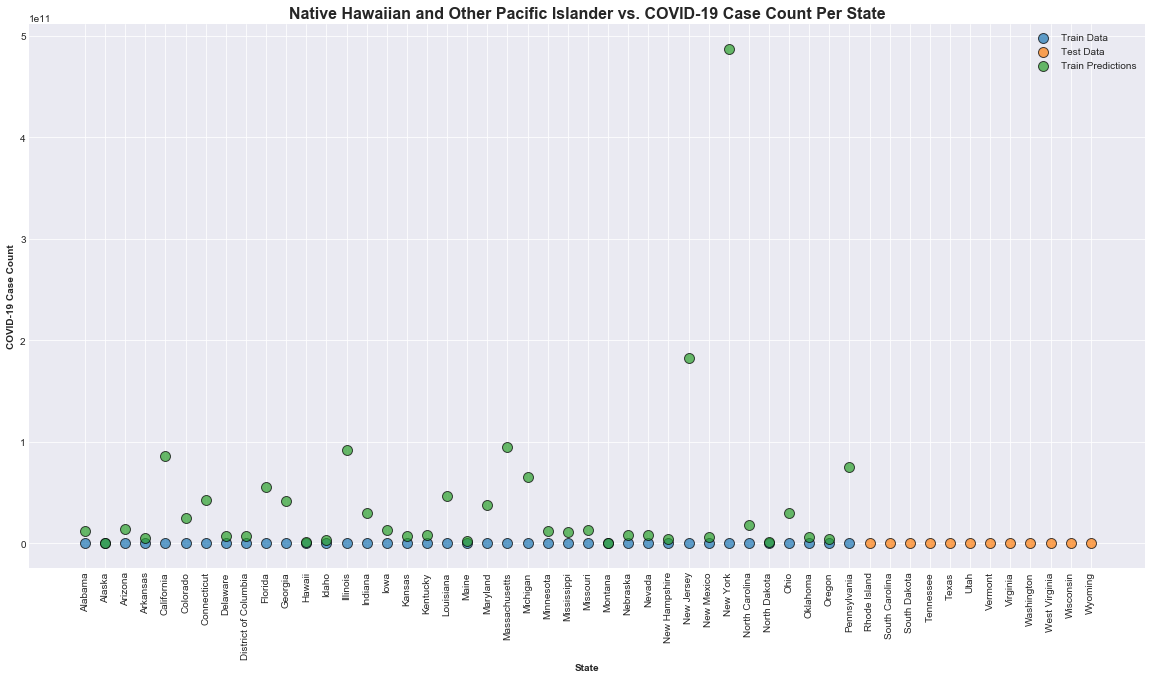

In [17]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = train['State'], y = train_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Native Hawaiian and Other Pacific Islander vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Train Predictions'])

plt.xticks(rotation = 90)
plt.show();

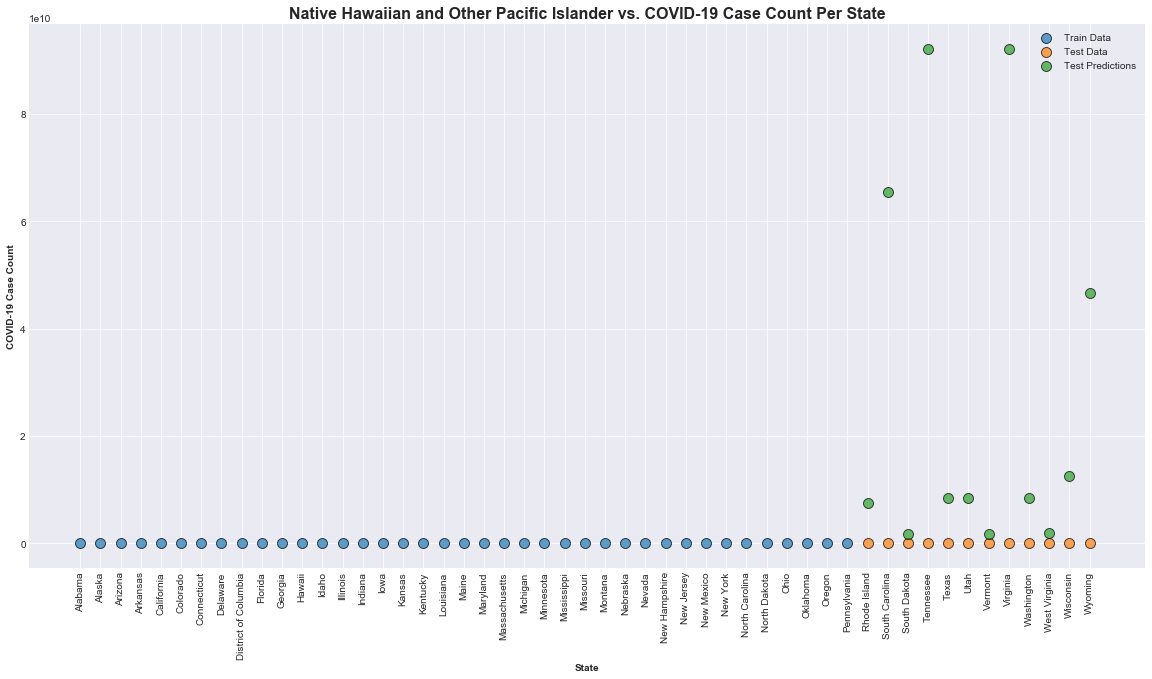

In [18]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Native Hawaiian and Other Pacific Islander vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Test Predictions'])

plt.xticks(rotation = 90)
plt.show();

In [19]:
features_list = ['Total population_HISPANIC OR LATINO']

target = 'cases'
    
X_train = train[features_list]
y_train = train[target]
X_test = test[features_list]
y_test = test[target]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(np.array(X_train).reshape(-1, 1))
X_test_scaled = scaler.transform(np.array(X_test).reshape(-1, 1))

XGBmodel = XGBRegressor()
XGBmodel.fit(X_train_scaled, y_train)

train_predictions_scaled = XGBmodel.predict(X_train_scaled)
train_predictions = scaler.inverse_transform(train_predictions_scaled)
test_predictions_scaled = XGBmodel.predict(X_test_scaled)
test_predictions = scaler.inverse_transform(test_predictions_scaled)


MAE = mean_absolute_error(y_test, test_predictions)
MSE = mean_squared_error(y_test, test_predictions)
RMS = sqrt(mean_squared_error(y_test, test_predictions))
R2Score = r2_score(y_test, test_predictions)

print('MAE Value:', MAE)
print('MSE Value:', MSE)
print('RMS Value:', RMS)
print('R2 Score:', R2Score)

MAE Value: 6671607035613.75
MSE Value: 1.6039589108707777e+26
RMS Value: 12664749941750.834
R2 Score: -872358841303074.0


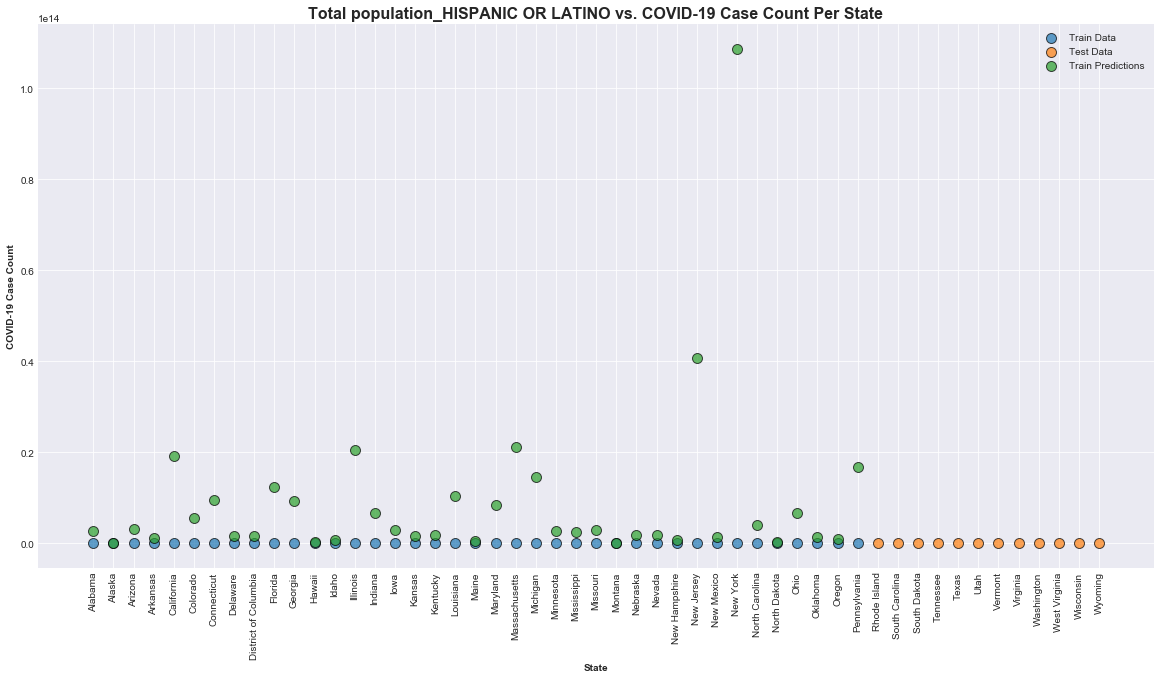

In [21]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = train['State'], y = train_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Total population_HISPANIC OR LATINO vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Train Predictions'])

plt.xticks(rotation = 90)
plt.show();

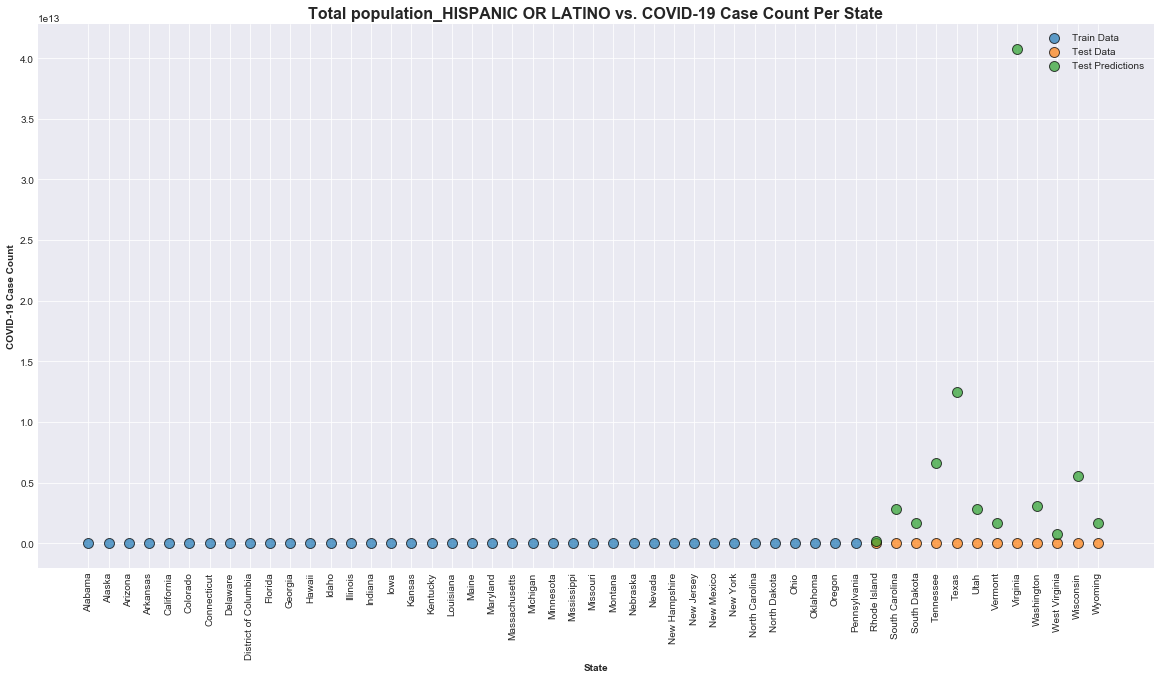

In [20]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Total population_HISPANIC OR LATINO vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Test Predictions'])

plt.xticks(rotation = 90)
plt.show();